Ensure you are using the kernel from the Data_Preprocessing.ipynb File


In [54]:
# Read in our dataset from "Data_Preprocessing.ipynb" kernel
# This line should work if everything is setup correctly
rf_data = clean_data
rf_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 731008 to 272925
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Flow Duration      1048575 non-null  int64  
 2   TotLen Fwd Pkts    1048575 non-null  int64  
 3   Fwd Pkt Len Max    1048575 non-null  int64  
 4   Fwd Pkt Len Min    1048575 non-null  int64  
 5   Fwd Pkt Len Mean   1048575 non-null  float64
 6   Bwd Pkt Len Max    1048575 non-null  int64  
 7   Bwd Pkt Len Min    1048575 non-null  int64  
 8   Bwd Pkt Len Mean   1048575 non-null  float64
 9   Flow IAT Mean      1048575 non-null  float64
 10  Bwd IAT Tot        1048575 non-null  int64  
 11  Bwd IAT Mean       1048575 non-null  float64
 12  Bwd IAT Max        1048575 non-null  int64  
 13  Bwd IAT Min        1048575 non-null  int64  
 14  Fwd PSH Flags      1048575 non-null  int64  
 15  Pkt Len Var        1048575 n

In [55]:
# Quick Peek at our dataset
print(rf_data.shape)
rf_data.head()

(1048575, 25)


,Dst Port,Flow Duration,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Flow IAT Mean,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Pkt Len Var,FIN Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Fwd Act Data Pkts,Active Std,Active Max,Active Min,Label
731008,53,12231,32,32,32,32.0,128,128,128.0,12231.0,0,0.0,0,0,0,3072.0,0,0,0,1,0,0.0,0,0,0
291231,22,6,0,0,0,0.0,0,0,0.0,6.0,0,0.0,0,0,0,0.0,0,1,0,1,0,0.0,0,0,2
799849,80,237,0,0,0,0.0,0,0,0.0,237.0,0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0
291472,22,6,0,0,0,0.0,0,0,0.0,6.0,0,0.0,0,0,0,0.0,0,1,0,1,0,0.0,0,0,2
537352,443,13366,0,0,0,0.0,0,0,0.0,6683.0,1,1.0,1,1,0,0.0,1,0,0,2,0,0.0,0,0,0


In [56]:
# Show how many observations are contained within each of the three possible labels
print(rf_data["Label"].value_counts())

# Save numerical values to a list for future data visualization
val_list = rf_data["Label"].value_counts().to_list()
print(val_list)
y = rf_data["Label"]
print(y)
y.value_counts()

0    667626
1    193360
2    187589
Name: Label, dtype: int64
[667626, 193360, 187589]
731008    0
291231    2
799849    0
291472    2
537352    0
         ..
881111    0
328201    2
826658    0
554534    0
272925    2
Name: Label, Length: 1048575, dtype: object


0    667626
1    193360
2    187589
Name: Label, dtype: int64

In [57]:
# Split our data from the labels
X = rf_data
y = rf_data["Label"].astype(int)
X = X.drop(columns="Label")
print(X)

        Dst Port  Flow Duration  TotLen Fwd Pkts  Fwd Pkt Len Max  \
731008        53          12231               32               32   
291231        22              6                0                0   
799849        80            237                0                0   
291472        22              6                0                0   
537352       443          13366                0                0   
...          ...            ...              ...              ...   
881111      3389        1672988             1144              677   
328201        22             18                0                0   
826658        53           1080               32               32   
554534        53           2010               42               42   
272925        22              8                0                0   

        Fwd Pkt Len Min  Fwd Pkt Len Mean  Bwd Pkt Len Max  Bwd Pkt Len Min  \
731008               32              32.0              128              128   
291231       

In [58]:
# Dilineate between columns containing strings and numerical data
str_feats = []
for column_name, column_value in X.items():
    if type(column_value[1]) == str:
        str_feats.append(column_name)
        
# Grab the numerical columns by taking everything that is not categorical
num_feats = X.columns.difference(str_feats)
df_feats = X[num_feats]

<Axes: title={'center': 'Pearson Correlation of Features'}>

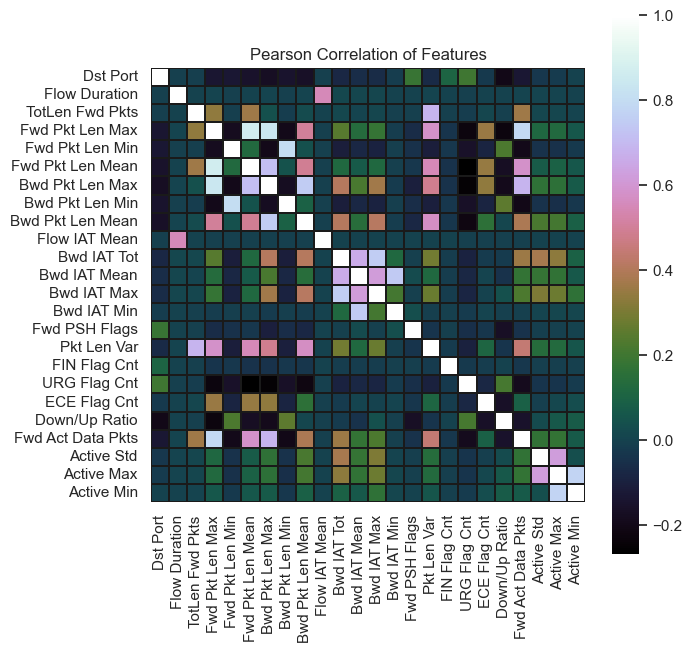

In [59]:
# Create a heatmap using Pearson Correlation
f, ax = plt.subplots(figsize=(7, 7))
plt.title("Pearson Correlation of Features")
sns.heatmap(df_feats.astype(float).corr(), linewidths=0.05, vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=False)

In [94]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [95]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#X_train = (X_train - X_train.mean()) / (X_train.max() - X_train.min())
#X_test = (X_test - X_test.mean()) / (X_test.max() - X_test.min())

In [96]:
# Random Forest Model Creation
rf = RandomForestClassifier(n_estimators=10, max_depth=20, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=10, random_state=42)

In [97]:
# Predict the classes from our Test data
y_pred = rf.predict(X_test)

# Print our simple accuracy score and look at a sample
print("Accuracy:", round((rf.score(X_test, y_test)*100), 2), "%")
print(y_pred[0:5])
print(y_test.iloc[0:5])

Accuracy: 65.81 %
[0 0 0 0 0]
477737    0
590153    0
167291    1
267501    2
290874    2
Name: Label, dtype: int64


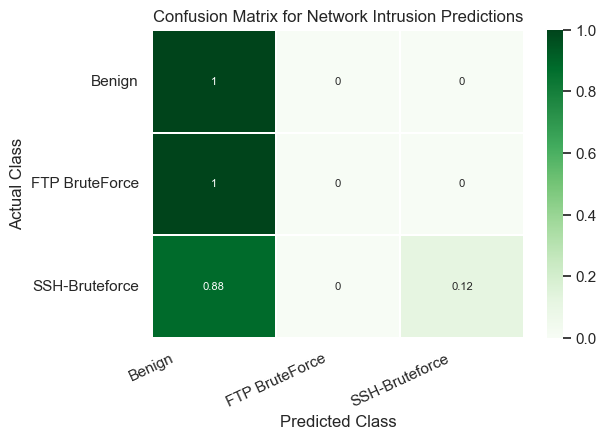

In [98]:
# Print out a confusion matrix of our data
labels = ["Benign", "FTP BruteForce", "SSH-Bruteforce"]
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(6, 4))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, annot_kws={'size':8}, cmap=plt.cm.Greens, linewidths=0.2)

tick_marks = np.arange(len(labels))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, labels, rotation=25)
plt.yticks(tick_marks2, labels, rotation=0)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Network Intrusion Predictions')
plt.show()

In [100]:
# Print out a classification report common to all models
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79    100144
           2       1.00      0.12      0.21     28139

   micro avg       0.66      0.81      0.72    128283
   macro avg       0.83      0.56      0.50    128283
weighted avg       0.73      0.81      0.66    128283

